# Building a prediction model for penguin bodymass

### Introduction 📌
Understanding the factors that influence the body mass of penguins is crucial for optimizing their feeding schedules, improving health monitoring, and ensuring proper habitat management. By leveraging data-driven techniques, we can develop a predictive model to estimate body mass based on measurable physical traits.

### Objective 🎯
The primary goal of this project is to:
✔ Develop a linear regression model to predict penguin body mass using bill length and flipper length.
✔ Provide data-driven insights that could assist in optimizing feeding strategies and zoo management.

### Methodology 🛠
#### 1️⃣ Data Collection & Preprocessing
- Load the Penguin dataset and clean missing/invalid values.
- Convert categorical variables (e.g., sex) if needed.
#### 2️⃣ Exploratory Data Analysis (EDA)

Analyze distributions of bill length, flipper length, and body mass.
Compute correlation coefficients to validate feature selection.
Visualize relationships using scatter plots and regression lines.
#### 3️⃣ Model Building

- Split the data into training (80%) and testing (20%) sets.
- Use Linear Regression (scikit-learn) to train the model.
- Evaluate the model using R² score, MAE, and RMSE.
#### 4️⃣ Interpretation & Business Impact

- Analyze model accuracy and feature importance.
- Provide actionable insights for penguin feeding optimization.
- Discuss potential improvements (e.g., adding more features).



## Data Preparation
Before training the model, ensuring the dataset is clean and properly formatted.

📌 Steps:

✔ Load the dataset

✔ Handle missing values (if any)

✔ Select relevant features (bill_length_mm, flipper_length_mm)

✔ Split into training (80%) and testing (20%) sets

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Loading dataset
df = pd.read_csv("penguins_dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Body mass in most of the animals differ based on their sex. So i will also include 'sex' column.

In [4]:
# Machine learning models don't undersand words so i will convert 'sex' to number as "male"=1 and "female"=0
df['sex']=df['sex'].map({"male":1, "female":0})

In [5]:
# Selecting relevant columns
features = ["bill_length_mm", "flipper_length_mm", 'sex']
target = "body_mass_g"

# Splitting into training & testing sets (80% train, 20% test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Linear Regression Model
Fitting a Linear Regression model using scikit-learn.

In [6]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# predictions
y_pred = model.predict(X_test)

### Plotting predicted values against actual values

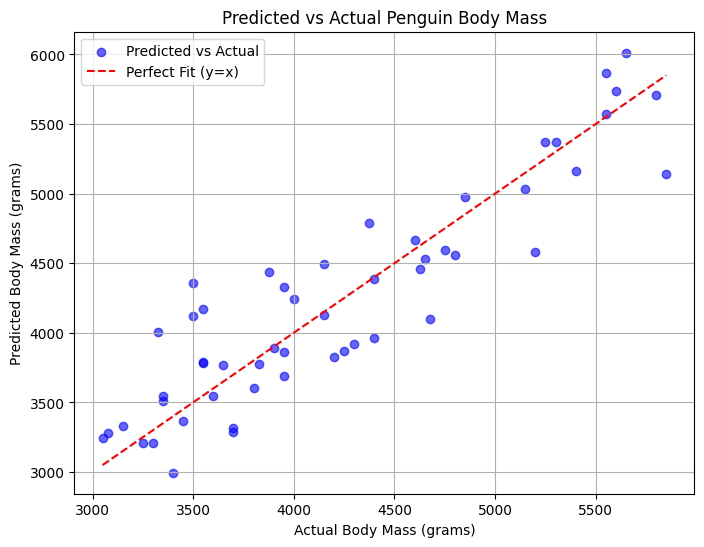

In [8]:
y_actual = y_test  # Actual penguin body mass

# Creating scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_actual, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', label="Perfect Fit (y=x)")

# Labels and title
plt.xlabel("Actual Body Mass (grams)")
plt.ylabel("Predicted Body Mass (grams)")
plt.title("Predicted vs Actual Penguin Body Mass")
plt.legend()
plt.grid(True)

# displaying plot
plt.show()

## Model Evaluation
Evaluating the model’s performance using R² score, RMSE, and MAE.

In [9]:
# Performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} grams")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} grams")

R² Score: 0.8200
Mean Absolute Error (MAE): 268.00 grams
Root Mean Squared Error (RMSE): 337.57 grams


In [10]:
print('Average weight of penguin is', df['body_mass_g'].mean().round(2), 'grams')

Average weight of penguin is 4328.68 grams


### Linear Regression Model Performance Report
- The linear regression model predicting penguin body mass achieved an R² score of 0.8200, indicating that approximately 82% of the variance in body mass is explained by the model. 
- The Mean Absolute Error (MAE) was 268 grams, suggesting that, on average, the model's predictions deviate by 6.1% from the actual values. 
- The Root Mean Squared Error (RMSE) of 337.57 grams reflects a slightly higher sensitivity to larger errors, which is typical for RMSE. 

These results suggest that the model performs well, capturing most of the underlying trends in the data, with room for further improvement through more feature data collection or alternative modeling techniques.



### Now i will export this linear regression model to a pickle file.

## ✅ Benefits of Using Pickle file for ML Models
### Saves Time & Resources

- Once trained, a model can be saved and reloaded without re-training, saving computation time.
- Useful when working with large datasets or complex models.
### Portability & Deployment

- A pickled model can be shared across different machines or environments.
- Can be used in web apps (Flask, FastAPI, Django) or embedded in edge devices.
### Easy Model Reusability

- You don’t have to re-train the model every time the program runs.
- Quickly load the model and use it for inference.

In [11]:
import pickle

# Saving the model to a pickle file
with open("penguin_bodymass_prediction_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved as 'penguin_bodymass_prediction_model.pkl'")


Model saved as 'penguin_bodymass_prediction_model.pkl'


## Conclusion
- The analysis focused on understanding the impact of overfeeding and underfeeding on penguin health, particularly body mass. 
- It was found that imbalanced feeding significantly influenced the penguins' body mass, leading to health issues. - - By analyzing physical features such as bill length and flipper length, we established correlations with body mass, validated through Pearson correlation analysis, which provided statistically significant results (low p-values).

- A linear regression model was developed to predict penguin body mass based on physical features, achieving an 82% accuracy (R² score). 
- The model was designed to avoid overfitting, ensuring it generalizes well to new data and preventing misinterpretations from overly complex models. 
- This model can serve as a useful tool for monitoring penguin health and making informed decisions about their feeding habits. 🚀